# Worldwide Total Video Game Console Sales Analysis

## 1. Introduction.

This notebook covers the analysis of some of the worlds best selling video games consoles, ranging from the 1970's to current day consoles.

## 2. Requirements.

The main insights that are required from this analysis are:

- Rank the consoles by their overall sales.
- Rank the consoles by their regional sales.
- Rank the consoles by their overall number of games.
- Rank the consoles by their overall msrp (highest to lowest).
- Rank the consoles by their form factor (handheld or not) and overall sales.
- Rank the consoles by their form factor (handheld or not) and regional sales.
- Rank the vendors by the overall consoles sold and what each one was.
- Rank the vendors by the regional consoles sold and what each one was.
- Determine what the most popular console was for each decade that is present in the data.
- The average price of a console for each decade in the data.
- The average life cycle of a console overall and by decade.
- The overall failure rate number for each console.

## 3. Data Collection.

The bulk of the data for this was collected using a web scraper from https://www.videogameconsolelibrary.com.

The originally scraped data was saved to a CSV file called 01-original-data.csv, which is stored in the data folder.

Additionally, a number of features were added to the data using Excel from a number of sources. These sources include:

- https://www.computinghistory.org.uk/ - Used for additional stats, such as launch price and release / discontinuation dates.
- https://www.macrotrends.net/ - Used for currency conversions of older systems reported in non-USD currencies.
- https://necretro.org/ - Used for additional stats, such as launch price and release / discontinuation dates.
- https://en.wikipedia.org/ Used for additional stats, such as launch price and release / discontinuation dates.

Lastly, the failure rate information for the xBox 360, PlayStation 3 and Wii were obtained from the below link:
https://www.squaretrade.com/htm/pdf/SquareTrade_Xbox360_PS3_Wii_Reliability_0809.pdf

The failure rate for other consoles is unknown so an estimate of 7.5% was used. This was determined by taking the failure rate of the Nintendo Wii (2.7%), which was rounded to 3% and the failure rate of the PlayStation 3 (10%) and working out the middle point between them (7.5%).

The final data that will be used for this is stored in `./data/02-processed-data.xlsx`. A CSV version (`02-processed-data.csv`) is also stored in the same location.

**NOTE** The Pandora console was removed as it is used mostly for emulation and has no real native games.

## 4. Data Dictionary.

The data dictionary is stored in `./data/00-data-dictionary.xlsx`.

## 5. Data Importing And Formatting.

### 5.1. Import The Required Libraries / Modules.

In [32]:
# -- Required libraries:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [33]:
# -- Required modules:
from modules.seaborn_templates import colours, sns_barplot_ax

### 5.2. Import The Data.

In [34]:
# -- Select the columns to use:  
columns = ["vendor", "platform", "handheld", "released_date", "discontinued_date",
           "total_available_games", "failure_rate_percentage", "msrp_usd",
           "global_millions", "europe_millions", "north_america_millions", 
           "japan_millions", "rest_of_the_world_millions", 
           "unknown_sales_millions"]

df = pd.read_excel(io = "./data/02-processed-data.xlsx", 
                   sheet_name = "02-processed-data",
                   usecols = columns,
                   dtype = {"global_millions": np.float64,
                            "europe_millions": np.float64, 
                            "north_america_millions": np.float64,
                            "japan_millions": np.float64, 
                            "rest_of_the_world_millions": np.float64,
                            "unknown_sales_millions": np.float64})

# -- Reindex the dataframe so that the columns are in the required order:
df = df.reindex(columns = columns)

### 5.3. Set Colour Pallette(s).

In [35]:
# -- Create the default colour pallette:
colour_pallette = colours(data = df)

In [36]:
# -- Set the defaults for Seaborn.
# -- Set the default size of figures:
sns.set(rc = {"figure.figsize": (8, 8)})


# -- Set the background colour of the axes and turn on the legend frame:
sns.set_style(rc = {'figure.facecolor': 'white',
                    'axes.labelcolor': '.15',
                    'xtick.direction': 'out',
                    'ytick.direction': 'out',
                    'xtick.color': '.15',
                    'ytick.color': '.15',
                    'axes.axisbelow': True,
                    'grid.linestyle': '-',
                    'text.color': '.15',
                    'font.family': ['sans-serif'],
                    'font.sans-serif': ['Arial',
                                        'DejaVu Sans',
                                        'Liberation Sans',
                                        'Bitstream Vera Sans',
                                        'sans-serif'],
                    'lines.solid_capstyle': 'round',
                    'patch.edgecolor': 'w',
                    'patch.force_edgecolor': True,
                    'image.cmap': 'rocket',
                    'xtick.top': False,
                    'ytick.right': False,
                    'axes.grid': True,
                    'axes.facecolor': '#EAEAF2',
                    'axes.edgecolor': 'black',
                    'grid.color': 'white',
                    'axes.spines.left': True,
                    'axes.spines.bottom': True,
                    'axes.spines.right': False,
                    'axes.spines.top': False,
                    'xtick.bottom': True,
                    'ytick.left': False,
                    "legend.frameon": True})

### 5.4. Check The DataTypes.

In [37]:
df.dtypes

vendor                         object
platform                       object
handheld                         bool
released_date                   int64
discontinued_date               int64
total_available_games           int64
failure_rate_percentage       float64
msrp_usd                      float64
global_millions               float64
europe_millions               float64
north_america_millions        float64
japan_millions                float64
rest_of_the_world_millions    float64
unknown_sales_millions        float64
dtype: object

### 5.5. Check The First Five Rows.

In [38]:
df.head(n = 5)

,vendor,platform,handheld,released_date,discontinued_date,total_available_games,failure_rate_percentage,msrp_usd,global_millions,europe_millions,north_america_millions,japan_millions,rest_of_the_world_millions,unknown_sales_millions
0,Sony,PlayStation 2 (PS2),False,2000,2013,3565,7.5,299.00,158.70,55.28,53.65,23.18,26.59,0.0
1,Nintendo,Nintendo DS (DS),True,2004,2014,3289,7.5,149.99,154.03,51.84,57.92,32.99,11.28,0.0
2,Nintendo,Nintendo Switch (NS),True,2017,0,2258,7.5,299.99,129.42,33.11,46.17,30.46,19.68,0.0
3,Nintendo,Game Boy (GB),True,1989,2003,1600,7.5,89.99,118.69,40.05,43.18,32.47,2.99,0.0
4,Sony,PlayStation 4 (PS4),False,2013,2021,2747,7.5,399.99,117.11,45.86,38.08,9.65,23.52,0.0


### 5.6. Check For NaN Values.

In [39]:
df.isna().sum()

vendor                        0
platform                      0
handheld                      0
released_date                 0
discontinued_date             0
total_available_games         0
failure_rate_percentage       0
msrp_usd                      0
global_millions               0
europe_millions               0
north_america_millions        0
japan_millions                0
rest_of_the_world_millions    0
unknown_sales_millions        0
dtype: int64

Observation: There are no NaN (not a number) values in the dataframe. 

As a result, it is ok to start exploring the data.

## 6. Exploratory Data Analysis.

### 6.1. Rank Consoles By Global Sales.

#### 6.1.1. Filter Data.

**NOTE:** Limiting results to top 20 for ease of output.

In [40]:
global_sales = df[["vendor","platform", "global_millions"]]\
                   .sort_values(by = "global_millions", 
                                ascending = False).head(20)\
                   .reset_index(drop = True)

#### 6.1.2. Show Global Sales (Table).

In [41]:
global_sales.head(20)

,vendor,platform,global_millions
0,Sony,PlayStation 2 (PS2),158.70
1,Nintendo,Nintendo DS (DS),154.03
2,Nintendo,Nintendo Switch (NS),129.42
3,Nintendo,Game Boy (GB),118.69
4,Sony,PlayStation 4 (PS4),117.11
5,Sony,PlayStation (PS),102.50
6,Nintendo,Nintendo Wii (Wii),101.63
7,Sony,PlayStation 3 (PS3),87.40
8,Microsoft,Xbox 360 (X360),85.73
9,Nintendo,Game Boy Advance (GBA),81.51


#### 6.1.3. Show Global Sales (Bar Chart).

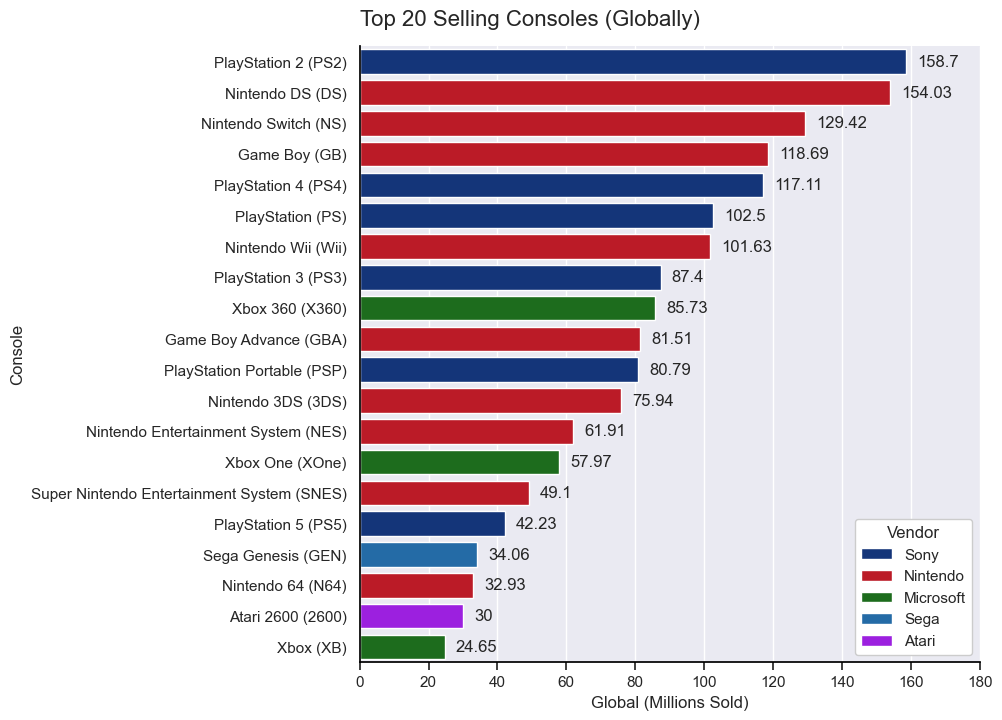

In [42]:
sns_barplot_ax(data = global_sales,
               x_axis = "global_millions",
               x_axis_label = "Global (Millions Sold)",
               x_axis_max_value = float(global_sales.global_millions.max()),
               y_axis = "platform",
               y_axis_label = "Console",
               hue = "vendor",
               pallette = colour_pallette,
               title = "Top 20 Selling Consoles (Globally)");

#### 6.1.4. Observations.

From the results of the date, the following has been observed:
- The top 5 selling consoles (globally) are dominated by Sony and Nintendo.
  - Both of the companies are Japanese based.
- Of the top 10 selling consoles (globally), only one is not made by Sony or Nintendo.
  - That is the ninth spot that is taken by Microsoft with the Xbox 360.
- There are a total of five vendors in the top 20 list, with Sega (17th) and Atari (19th) having one entry each. The remainder consists of Sony, Nintendo and Microsoft.

### 6.2. Rank Consoles By Regional Sales.

#### 6.2.1. European Sales.

##### 6.2.1.1. Filter Data.

In [43]:
european_sales = df[["vendor","platform", "europe_millions"]]\
                     .sort_values(by = "europe_millions", 
                                  ascending = False).head(20)\
                     .reset_index(drop = True)

##### 6.2.1.2. Show European Sales (Table).

In [44]:
european_sales.head(20)

,vendor,platform,europe_millions
0,Sony,PlayStation 2 (PS2),55.28
1,Nintendo,Nintendo DS (DS),51.84
2,Sony,PlayStation 4 (PS4),45.86
3,Nintendo,Game Boy (GB),40.05
4,Nintendo,Nintendo Wii (Wii),33.12
5,Nintendo,Nintendo Switch (NS),33.11
6,Sony,PlayStation (PS),31.09
7,Sony,PlayStation 3 (PS3),30.87
8,Microsoft,Xbox 360 (X360),25.08
9,Sony,PlayStation Portable (PSP),24.39


##### 6.2.1.3. Show European Sales (Bar Chart).

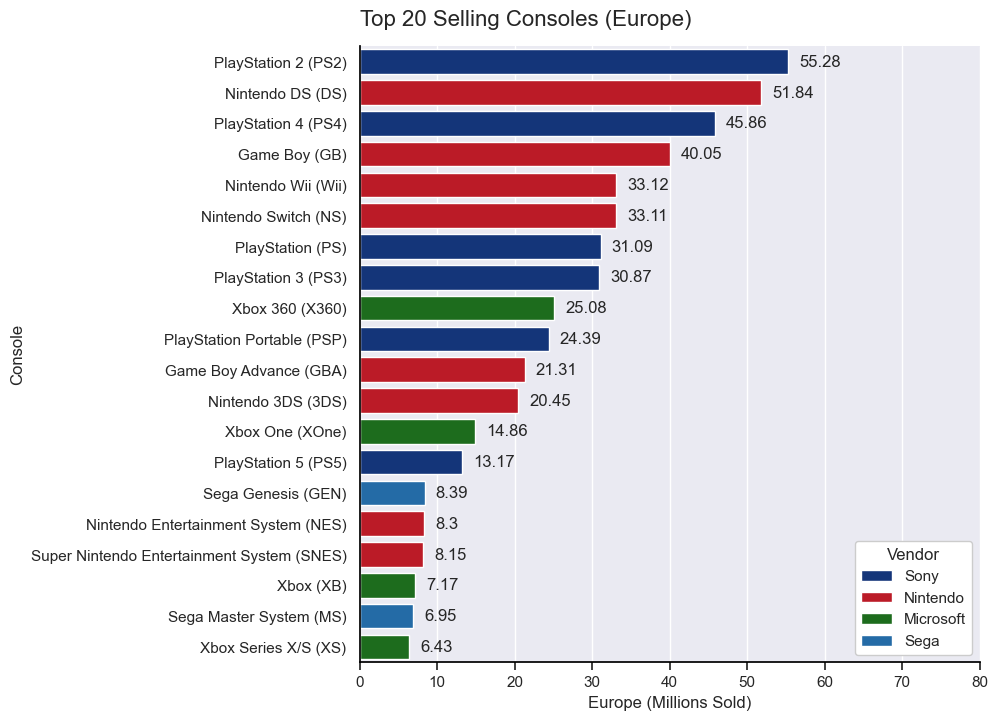

In [45]:
sns_barplot_ax(data = european_sales,
               x_axis = "europe_millions",
               x_axis_label = "Europe (Millions Sold)",
               x_axis_max_value = float(european_sales.europe_millions.max()),
               y_axis = "platform",
               y_axis_label = "Console",
               hue = "vendor",
               pallette = colour_pallette,
               title = "Top 20 Selling Consoles (Europe)");

##### 6.2.1.4. Observations.

#### 6.2.2. Japanese Sales.

##### 6.2.2.1. Filter Data.

In [46]:
japanese_sales = df[["vendor","platform", "japan_millions"]]\
                     .sort_values(by = "japan_millions", 
                                  ascending = False).head(20)\
                     .reset_index(drop = True)

##### 6.2.2.2. Show Japanese Sales (Table).

In [47]:
japanese_sales.head(20)

,vendor,platform,japan_millions
0,Nintendo,Nintendo DS (DS),32.99
1,Nintendo,Game Boy (GB),32.47
2,Nintendo,Nintendo Switch (NS),30.46
3,Nintendo,Nintendo 3DS (3DS),24.67
4,Sony,PlayStation 2 (PS2),23.18
5,Sony,PlayStation (PS),21.59
6,Sony,PlayStation Portable (PSP),20.01
7,Nintendo,Nintendo Entertainment System (NES),19.35
8,Nintendo,Super Nintendo Entertainment System (SNES),17.17
9,Nintendo,Game Boy Advance (GBA),16.96


##### 6.2.2.3. Show Japanese Sales (Bar Chart).

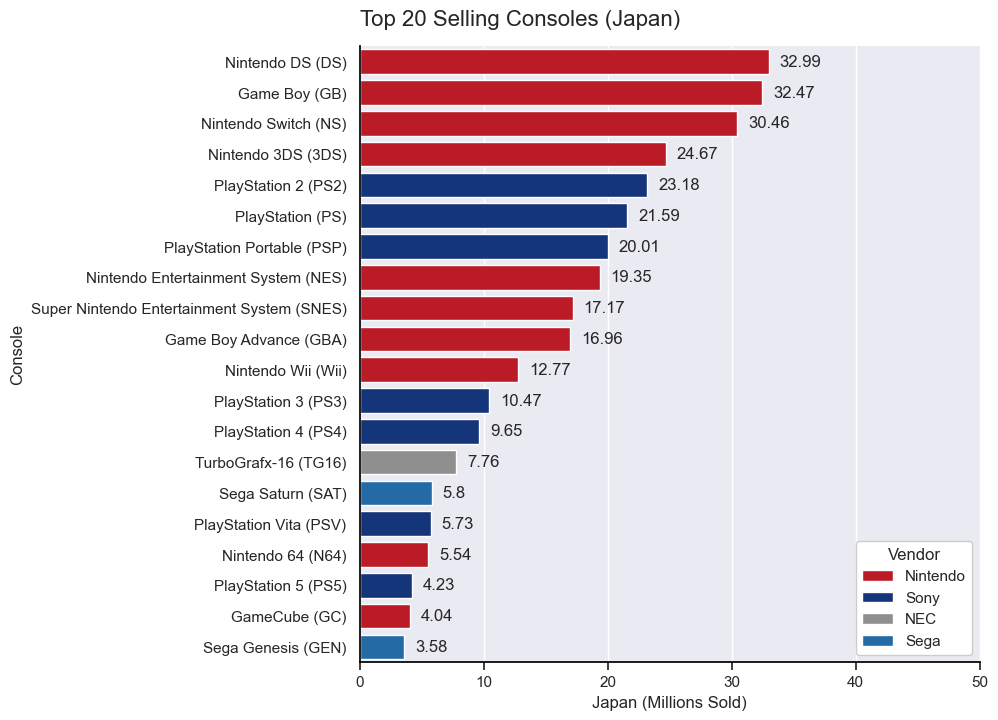

In [48]:
sns_barplot_ax(data = japanese_sales,
               x_axis = "japan_millions",
               x_axis_label = "Japan (Millions Sold)",
               x_axis_max_value = float(japanese_sales.japan_millions.max()),
               y_axis = "platform",
               y_axis_label = "Console",
               hue = "vendor",
               pallette = colour_pallette,
               title = "Top 20 Selling Consoles (Japan)");

##### 6.2.2.4. Observations.

#### 6.2.3. North American Sales.

##### 6.2.3.1. Filter Data.

In [49]:
na_sales = df[["vendor","platform", "north_america_millions"]]\
               .sort_values(by = "north_america_millions", 
                            ascending = False).head(20)\
               .reset_index(drop = True)

##### 6.2.3.2. Show North American Sales (Table).

In [50]:
na_sales.head(20)

,vendor,platform,north_america_millions
0,Nintendo,Nintendo DS (DS),57.92
1,Sony,PlayStation 2 (PS2),53.65
2,Microsoft,Xbox 360 (X360),47.09
3,Nintendo,Nintendo Switch (NS),46.17
4,Nintendo,Nintendo Wii (Wii),45.51
5,Nintendo,Game Boy (GB),43.18
6,Sony,PlayStation (PS),40.78
7,Nintendo,Game Boy Advance (GBA),40.39
8,Sony,PlayStation 4 (PS4),38.08
9,Nintendo,Nintendo Entertainment System (NES),33.49


##### 6.2.3.3. Show North American Sales (Bar Chart).

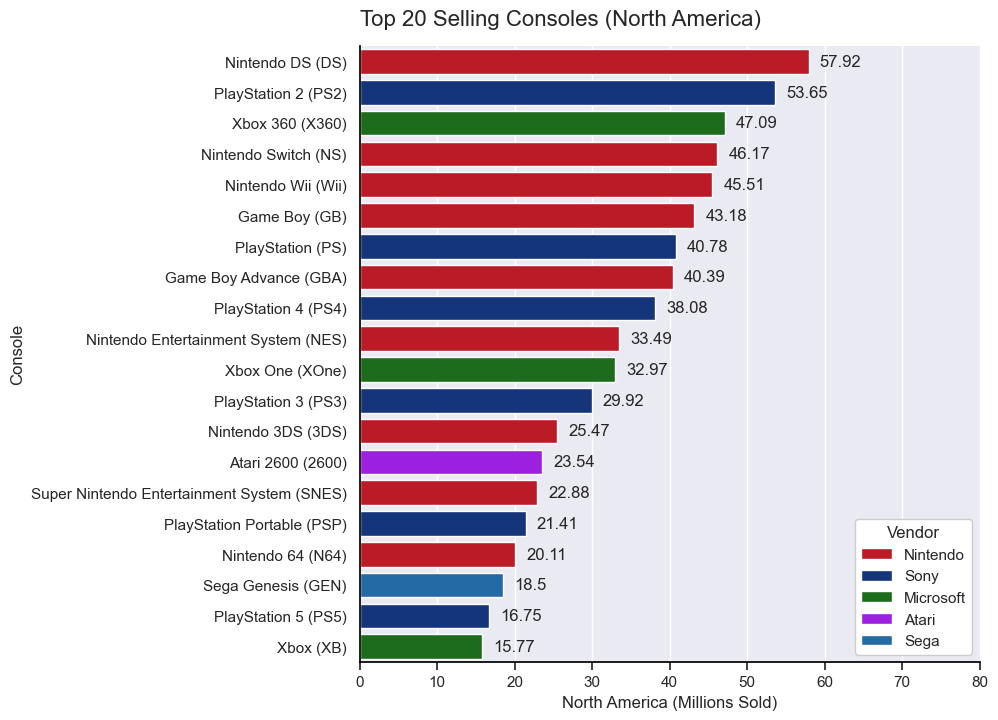

In [51]:
sns_barplot_ax(data = na_sales,
               x_axis = "north_america_millions",
               x_axis_label = "North America (Millions Sold)",
               x_axis_max_value = float(na_sales.north_america_millions.max()),
               y_axis = "platform",
               y_axis_label = "Console",
               hue = "vendor",
               pallette = colour_pallette,
               title = "Top 20 Selling Consoles (North America)");

##### 6.2.3.4. Observations.

#### 6.2.4. Rest Of The World Sales.

##### 6.2.4.1 Filter Data.

In [52]:
row_sales = df[["vendor","platform", "rest_of_the_world_millions"]]\
                .sort_values(by = "rest_of_the_world_millions", 
                             ascending = False).head(20)\
                .reset_index(drop = True)

##### 6.2.4.2. Show Rest Of The World Sales (Table).

In [53]:
row_sales.head(20)

,vendor,platform,rest_of_the_world_millions
0,Sony,PlayStation 2 (PS2),26.59
1,Sony,PlayStation 4 (PS4),23.52
2,Nintendo,Nintendo Switch (NS),19.68
3,Sony,PlayStation 3 (PS3),16.14
4,Sony,PlayStation Portable (PSP),14.98
5,Microsoft,Xbox 360 (X360),11.90
6,Nintendo,Nintendo DS (DS),11.28
7,Nintendo,Nintendo Wii (Wii),10.23
8,Microsoft,Xbox One (XOne),10.02
9,Sega,Sega Master System (MS),9.37


##### 6.2.4.3. Show Rest Of The World Sales (Bar Chart).

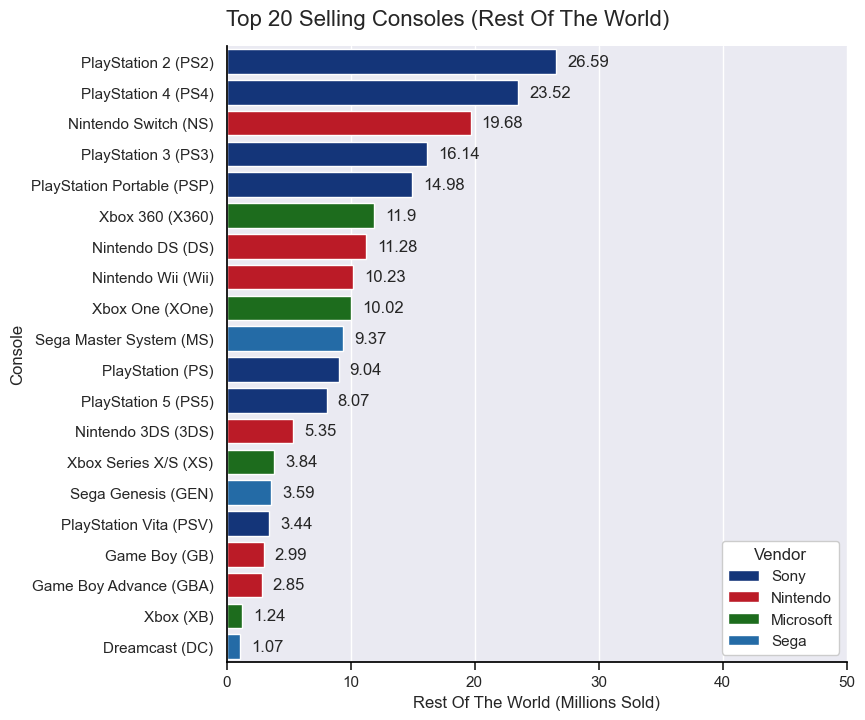

In [54]:
sns_barplot_ax(data = row_sales,
               x_axis = "rest_of_the_world_millions",
               x_axis_label = "Rest Of The World (Millions Sold)",
               x_axis_max_value = float(row_sales.rest_of_the_world_millions.max()),
               y_axis = "platform",
               y_axis_label = "Console",
               hue = "vendor",
               pallette = colour_pallette,
               title = "Top 20 Selling Consoles (Rest Of The World)");

##### 6.2.4.4. Observations.

#### 6.2.5. Uncategorised Sales.

##### 6.2.5.1 Filter Data.

In [55]:
unknown_sales = df[["vendor","platform", "unknown_sales_millions"]]\
                .sort_values(by = "unknown_sales_millions", 
                             ascending = False).head(20)\
                .reset_index(drop = True)

##### 6.2.5.2. Show Uncategorised Sales (Table).

In [56]:
unknown_sales.head(20)

,vendor,platform,unknown_sales_millions
0,Sega,Sega Advanced Pico Beena (Beena),4.10
1,Sega,Sega Pico (Pico),3.40
2,Nokia,N-Gage (NGage),3.00
3,Mattel Electronics,Intellivision (Int),3.00
4,Magnavox,Magnavox Odyssey 2 (Odys2),2.00
5,Coleco,ColecoVision (CV),2.00
6,The 3DO Company,3DO Interactive Multiplayer (3DO),2.00
7,Sega,Sega CD (SCD),1.84
8,NEC,TurboExpress (TE),1.50
9,NEC,TurboGrafx-16 (TG16),1.49


##### 6.2.5.3. Show Uncategorised Sales (Bar Chart).

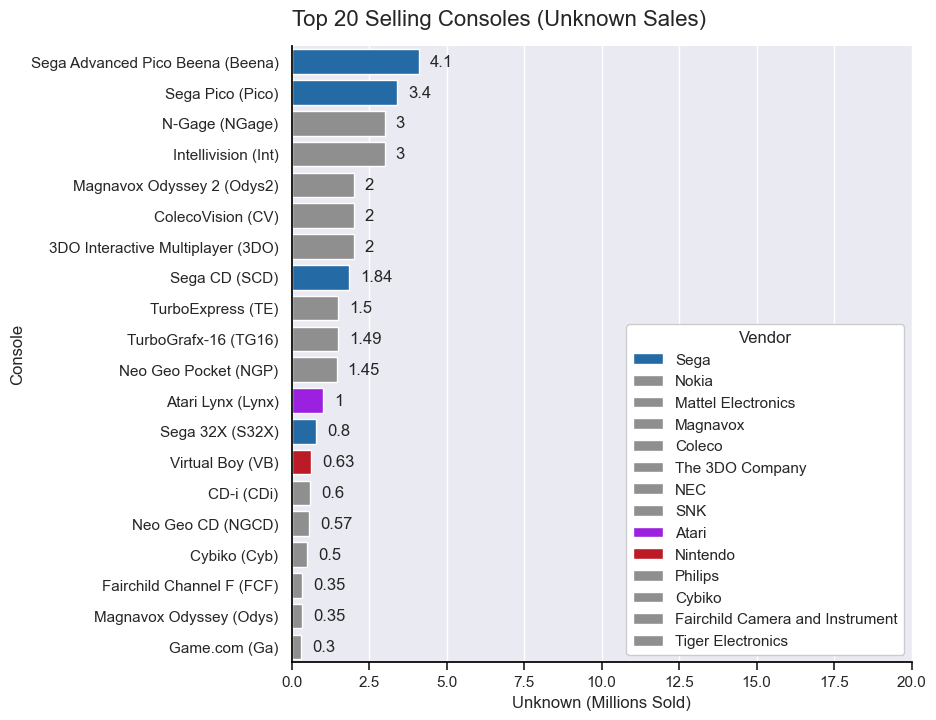

In [57]:
sns_barplot_ax(data = unknown_sales,
               x_axis = "unknown_sales_millions",
               x_axis_label = "Unknown (Millions Sold)",
               x_axis_max_value = float(unknown_sales.unknown_sales_millions.max()),
               y_axis = "platform",
               y_axis_label = "Console",
               hue = "vendor",
               pallette = colour_pallette,
               title = "Top 20 Selling Consoles (Unknown Sales)");

##### 6.2.5.4. Observations.

### 6.3. Rank Consoles By Total Games Available.

#### 6.3.1. Filter Data.

In [58]:
# -- Create a dataframe with the required filters and features:
games_ranking = df[["vendor","platform", "total_available_games", "released_date"]]\
                 .sort_values(by = "total_available_games", 
                              ascending = False)\
                 .reset_index(drop = True)

# -- Add 1 to each index to give the actual rank rather than starting at 0:
games_ranking.index = games_ranking.index +1

#### 6.3.2. Show Top 20 Consoles By Available Games.

In [59]:
games_ranking.head(20)

,vendor,platform,total_available_games,released_date
1,Sony,PlayStation 2 (PS2),3565,2000
2,Nintendo,Nintendo DS (DS),3289,2004
3,Sony,PlayStation 4 (PS4),2747,2013
4,Sony,PlayStation (PS),2707,1994
5,Nintendo,Nintendo Switch (NS),2258,2017
6,Sony,PlayStation 3 (PS3),1905,2006
7,Microsoft,Xbox One (XOne),1904,2013
8,Sony,PlayStation Portable (PSP),1807,2004
9,Microsoft,Xbox 360 (X360),1735,2005
10,Nintendo,Nintendo Wii (Wii),1676,2006


#### 6.3.3. Show Bottom 20 Consoles By Available Games.

In [60]:
games_ranking.tail(20)

,vendor,platform,total_available_games,released_date
63,Magnavox,Magnavox Odyssey (Odys),28,1972
64,Game Park,GamePark 32 (GP32),28,2001
65,Tomy,Tomy Tutor (TT),27,1982
66,Ouya,Ouya (Ouya),25,2013
67,Commodore,Commodore 64 Games System (C64GS),25,1990
68,Panic Inc.,Playdate (PD),24,2022
69,Nintendo,Virtual Boy (VB),22,1995
70,Game Park,GP2X (GP2X),22,2005
71,Tiger Electronics,Game.com (Ga),21,1997
72,iQue,IQue Player (IQue),17,2003


#### 6.3.4. Observations.

- The top 20 consoles with the most games are again dominated by Nintendo, Microsoft and Sony, along with Sega.
- With the exception of one (Nintendo), the bottom 20 consoles by available games are from vendors that don't make their own consoles anymore.

### 6.4. Rank Consoles By MSRP (Highest To Lowest).

#### 6.4.1. Filter Data.

In [61]:
# -- Create a dataframe with the required filters and features:
msrp_ranking = df[["vendor","platform", "msrp_usd", "released_date"]]\
                 .sort_values(by = "msrp_usd", 
                              ascending = False).head(20)\
                 .reset_index(drop = True)

# -- Add 1 to each index to give the actual rank rather than starting at 0:
msrp_ranking.index = msrp_ranking.index +1

#### 6.4.2. Show Results (Table).

In [62]:
msrp_ranking

,vendor,platform,msrp_usd,released_date
1,Philips,CD-i (CDi),1000.00,1990
2,Fujitsu,FM Towns Marty (FMTM),710.00,1993
3,The 3DO Company,3DO Interactive Multiplayer (3DO),699.99,1993
4,Tandy,Tandy Video Information System (VIS),699.00,1992
5,SNK,Neo Geo (NG),649.00,1990
6,Sony,PlayStation 3 (PS3),599.99,2006
7,Apple,Apple Pippin (AP),599.00,1996
8,Microsoft,Xbox Series X/S (XS),499.00,2020
9,NEC,PC-FX (PCFX),499.00,1994
10,Sony,PlayStation 5 (PS5),499.00,2020


#### 6.4.3. Observations.

- Of the top 20 list, only Microsoft, Nintendo and Sony are still manufacturing consoles.
- The majority of the top 20 highest priced consoles at launch are from companies that no longer manufacture consoles under their respective name.
- The top 5 most expensive consoles were released between 1990 and 1999.
- Of the top 20, 10 were released between 1990 and 1999.

### 6.5. Rank Consoles By Form Factor (Handheld Or Not) Base On World-Wide Sales.

### 6.6. Rank Consoles By Form Factor (Handheld Or Not) Base On Regional Sales.

### 6.7. Rank Vendors By World-Wide Consoles Sold And What Each Console Is.

### 6.8. Rank Vendors By Regional Consoles Sold And What Each Console Is.

### 6.9. What Is The Most Popular Console For Each Decade.

### 6.10. The Average Price Of A Console For Each Decade.

### 6.11. The Average Life Cycle Of A Console Overall And By Decade.

### 6.12. The Failure Rate For Each Console.